# Introduction to TensorFlow

TensorFlow is a powerful open source software library for numerical computation,
particularly well suited and fine-tuned for large-scale Machine Learning. Its basic
principle is simple: you first define in Python a graph of computations to perform,
and then TensorFlow takes that graph and runs it efficiently using optimized C++ code.

![](img/fig9.png)

![](img/fig10.png)

### Some installation notes
* For GPU support, you need to install tensorflow-gpu instead of tensorflow.
* Use `conda` instead of `pip` (See [this](https://towardsdatascience.com/stop-installing-tensorflow-using-pip-for-performance-sake-5854f9d9eb0c) benchmark)
* Use python 3.6 (for the moment, avoid python 3.7)
* Check tensorflow version
* Source installation, not so friendly

In [1]:
import tensorflow as tf
tf.__version__

'1.11.0'

### Parameters
* The `variable`'s have a fixed size, they contain the parameters of a model, which can then be saved or restored.

* The `variable`'s can have a constant value, but they are usually initialized with some random or determined value, and their content varies during the optimization process.

![](img/fig9.png)

In [2]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2
print(x)
print(y)
print(f)

<tf.Variable 'x:0' shape=() dtype=int32_ref>
<tf.Variable 'y:0' shape=() dtype=int32_ref>
Tensor("add_1:0", shape=(), dtype=int32)


In [3]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("tmp", sess.graph)

In [4]:
!tensorboard --logdir tmp

TensorBoard 1.11.0 at http://biocomp06:6006 (Press CTRL+C to quit)
^C


In [5]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

print(result)

42


In [6]:
# Jupyter notebook trick
tf.reset_default_graph()

## Lifecycle of a Node Value
When you evaluate a node, TensorFlow automatically determines the set of nodes
that it depends on and it evaluates these nodes first.

In [7]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

In [8]:
%%time
with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15
CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 8.24 ms


In [9]:
%%time
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)
    print(z_val)

10
15
CPU times: user 6.22 ms, sys: 603 µs, total: 6.83 ms
Wall time: 5.66 ms


### Linear Regression with TensorFlow

#### Linear Regression
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$
where
* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the i$^\text{th}$ feature
* $x_j$ is the j$^\text{th}$ model parameter

$$\hat{y} = h_\theta(x) = \theta^T \cdot \textbf{x} $$
#### Optimize
**The Normal Equation** 
$$\hat\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

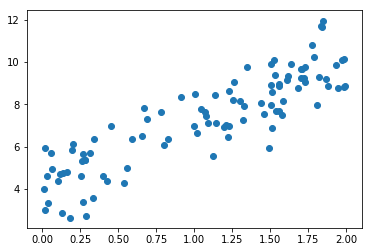

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

m = 100

X = 2 * np.random.rand(m, 1)
Y = 4 + 3 * X + np.random.randn(m, 1)

plt.scatter(X,Y)

X_b = np.c_[np.ones((100, 1)), X]

In [11]:
tf.reset_default_graph()

In [12]:
x = tf.constant(X_b, dtype=tf.float32, name='X')
y = tf.constant(Y, dtype=tf.float32, name='y')
xt = tf.transpose(x)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(xt, x)), xt), y)

In [13]:
print(x)
print(theta)

Tensor("X:0", shape=(100, 2), dtype=float32)
Tensor("MatMul_2:0", shape=(2, 1), dtype=float32)


In [14]:
with tf.Session() as sess:
    theta_value = theta.eval()
theta_value

array([[4.158507],
       [2.948627]], dtype=float32)

Just like Numpy, more code, great GPU support

## Gradient

In [15]:
tf.reset_default_graph()
x = tf.Variable(initial_value=tf.random_normal([1]), name="x", dtype=tf.float32)
y = tf.Variable(initial_value=tf.random_normal([1]), name="y", dtype=tf.float32)
f = x**2+y**2
f

<tf.Tensor 'add:0' shape=(1,) dtype=float32>

In [16]:
dx = tf.gradients(f, x)
dy = tf.gradients(f, y)

In [17]:
val_x, val_y = 5, 2
with tf.Session() as sess:
    val_f, val_dx, val_dy = sess.run([f, dx, dy], feed_dict={x: [val_x], y:[val_y]})
print(" f(%d,%d) = %d"%(val_x, val_y, val_f))
print("dx(%d,%d) = %d"%(val_x, val_y, val_dx[0]))
print("dy(%d,%d) = %d"%(val_x, val_y, val_dy[0]))

 f(5,2) = 29
dx(5,2) = 10
dy(5,2) = 4


In [18]:
from sympy import symbols, diff, evalf

x, y = symbols('x y')
f = x**2 + y**2
dx = diff(f, x)
dy = diff(f, y)
print(f,'\t', dx,'\t', dy)
print(" f(%d,%d) = %d"%(val_x, val_y, f.evalf(subs={x:val_x, y:val_y})))
print("dx(%d,%d) = %d"%(val_x, val_y, dx.evalf(subs={x:val_x, y:val_y})))
print("dy(%d,%d) = %d"%(val_x, val_y, dy.evalf(subs={x:val_x, y:val_y})))

ModuleNotFoundError: No module named 'sympy'

So TensorFlow computes the gradients for you. But it gets even easier: it also provides
a number of optimizers out of the box, including a Gradient Descent optimizer.

## Feeding Data to the Training Algorithm

### Data
* The `placeholder`'s can be matrices (tensors) with a fixed number of columns, but variable rows, in order to evaluate expressions with different datasets.

* The `placeholder`'s do not have initial values, and you have to feed them directly with the data

In [ ]:
tf.reset_default_graph()
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5

with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})
    
print(B_val_1)
print(B_val_2)

## Saving and Restoring Models

#### Save
```python
[...]
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
[...]
init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0: # checkpoint every 100 epochs
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
    
        sess.run(training_op)

    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
```

#### Restore
```python
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    [...]
```

By default a Saver saves and restores all variables under their own name, but if you
need more control, you can specify which variables to save or restore
```python
saver = tf.train.Saver({"weights": theta})```

### [Example](TF-01.ipynb)

# Keras

In [21]:
from Utils.mnist import MNIST
data = MNIST(data_dir="data/MNIST")
print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [23]:
def get_model_A():
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(100, activation='tanh', input_dim=784))
    model.add(Dense(200, activation='tanh'))
    model.add(Dense(500, activation='tanh'))
    model.add(Dense(200, activation='tanh'))
    model.add(Dense(200, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.reset_states()
    return model

model = get_model_A()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               100500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 341,610
Trainable params: 341,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
model.fit(data.x_test, data.y_test, epochs=40, batch_size=64, validation_data=(data.x_test, data.y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 2s 153us/step - loss: 0.4681 - acc: 0.8532 - val_loss: 0.2667 - val_acc: 0.9170
Epoch 2/40
10000/10000 [==============================] - 1s 90us/step - loss: 0.2527 - acc: 0.9215 - val_loss: 0.1983 - val_acc: 0.9382
Epoch 3/40
10000/10000 [==============================] - 1s 101us/step - loss: 0.2032 - acc: 0.9361 - val_loss: 0.1564 - val_acc: 0.9517
Epoch 4/40
10000/10000 [==============================] - 1s 100us/step - loss: 0.1576 - acc: 0.9492 - val_loss: 0.1201 - val_acc: 0.9594
Epoch 5/40
10000/10000 [==============================] - 1s 95us/step - loss: 0.1212 - acc: 0.9602 - val_loss: 0.0885 - val_acc: 0.9710
Epoch 6/40
10000/10000 [==============================] - 1s 95us/step - loss: 0.0989 - acc: 0.9685 - val_loss: 0.0558 - val_acc: 0.9852
Epoch 7/40
10000/10000 [==============================] - 1s 107us/step - loss: 0.0655 - acc: 0.9800 - val_loss: 0.0795 - val